In [250]:
# I will use in this Kernel the step-by-step process of Will Koehrsen.
# I won't use everything, but most of them.
# This project at in GitHub repository: https://github.com/WillKoehrsen/machine-learning-project-walkthrough

In [251]:
# Let's import the main libraries that I will use in this dataset.

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 9 columns of a dataframe
pd.set_option('display.max_columns', 9)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [252]:
# I will check the two CSV files to see what the difference between them.

graduate_first = pd.read_csv('../input/Admission_Predict.csv')
graduate_first.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [253]:
graduate_first.shape

(400, 9)

In [254]:
graduate_second = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')
graduate_second.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [255]:
graduate_second.shape

(500, 9)

In [256]:
# I saw that maybe the second one is a recent version, so I will use this one.
graduate = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')

# I will drop the 'Serial No' because it's not important for our model.
graduate.drop(labels='Serial No.', axis=1, inplace=True)

In [257]:
# See the column data types and non-missing values.
graduate.info()

# Apparently we don't have any missing values;
# We don't have any 'object' column to convert to 'float' or 'int'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [258]:
# Statistics for each column

graduate.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [259]:
# with the pourpuse to be sure about no missing values in our dataset. I will code a function which will help us on it.

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [260]:
missing_values_table(graduate)

# Great! Now we now that for sure we don't have any missing values.

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [261]:
# Let's start now the Exploratory Data Analysis (EDA) to understand better our dataset and see the correlations among the variables.

# Fist I will see the name of the columns. The goal here is read the name of the columns and realize some strange names or even errors.
# Sometimes is a good practice to rename some of them to easy manipulate.

graduate.columns

# We can see below that some column names has a space in the end, is good to rename them droping these spaces.
# To manipule better the columns, I will chance the name of some of them as weel.

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [262]:
graduate.rename(columns = {'Serial No.': 'SerialNo', 'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'University Rating': 'UniversityRating', 'LOR ': 'LOR', 'Chance of Admit ': 'Chance'}, inplace=True)
graduate.columns

Index(['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance'],
      dtype='object')

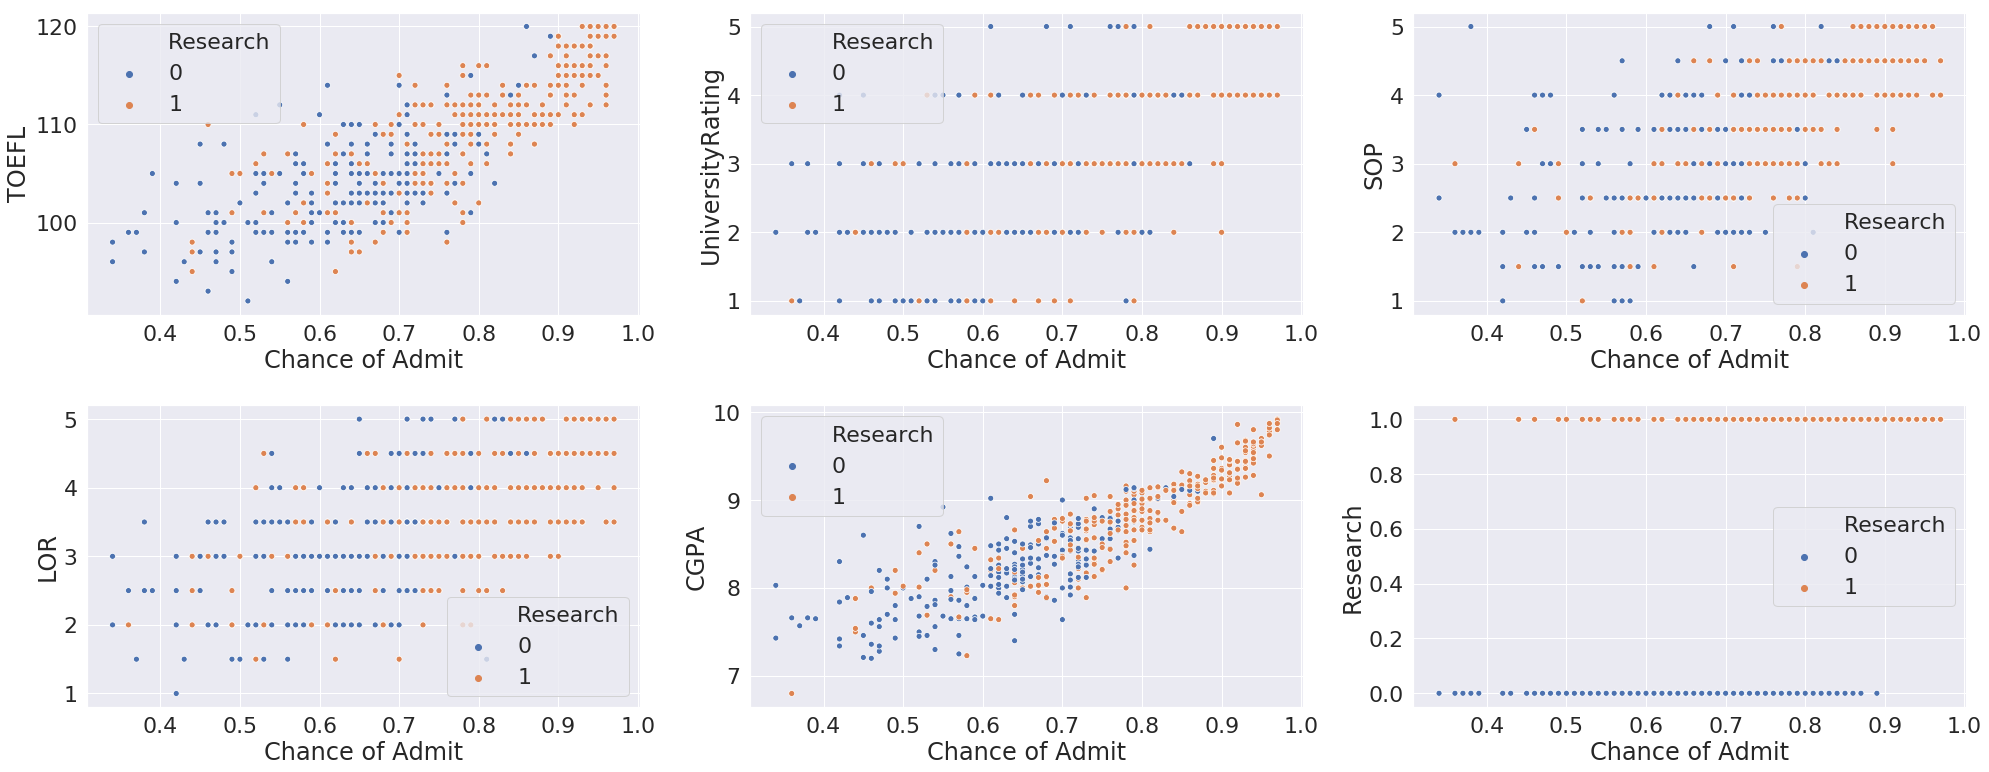

In [263]:
# First of all, I will see the correlation between any variable with the target.

# I will drop the 'SerialNo' and 'Research' columns because the serial number just identify the student and the Research has a boolean value and I will 
# use in the 'hue' parameter.

fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1, 7):
    ax = fig.add_subplot(3, 3, i)
    sns.scatterplot(x=graduate['Chance'], y= graduate.iloc[:,i], hue=graduate.Research)
    plt.xlabel('Chance of Admit')
    plt.ylabel(graduate.columns[i])
    
# Conclusions:
#    - The better graph of the features 'UniversityRating', 'SOP', 'LOR' and 'Research' is not scatterplot;
#    - 'GRE', 'TOEFL' and 'CGPA' graphs have a linear behavior;
#    - The tendency which we can see is, as higher as the 'GRE', 'TOEFL' and 'CGPA' higher is the chance of admission;
#    - The other tendency that we can see is if the person has a research has more probability to be admitted.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


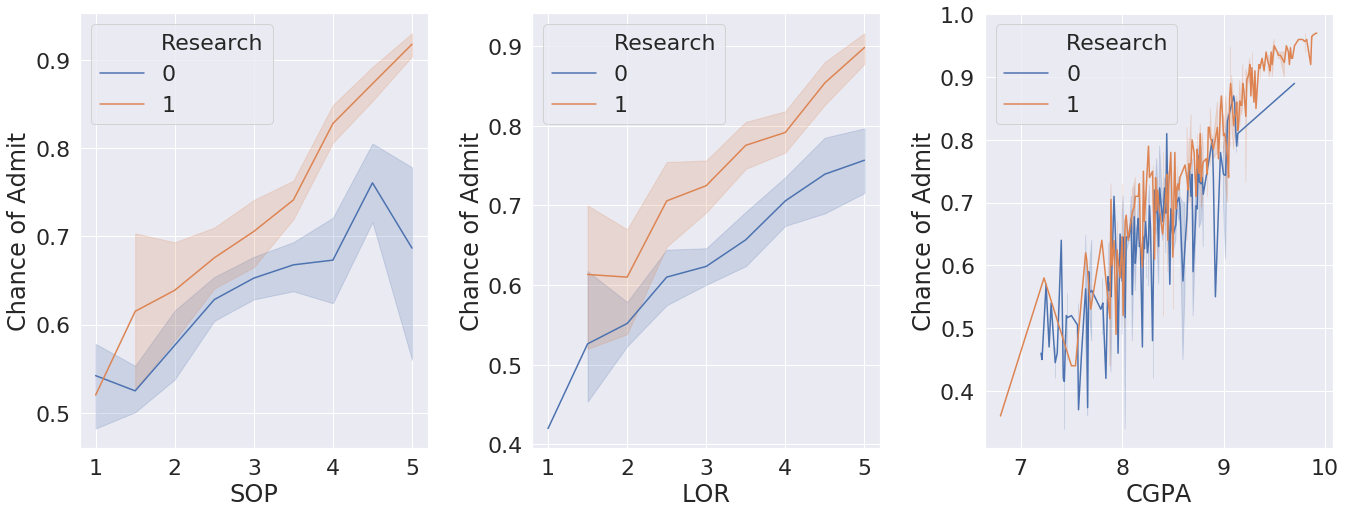

In [264]:
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.1, wspace=0.3)
for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    sns.lineplot(x= graduate.iloc[:,i+2], y= graduate['Chance'], hue=graduate.Research)
    plt.xlabel(graduate.columns[i+2])
    plt.ylabel('Chance of Admit')
    
# Conclusion:
#    - Here we can see again a linear correlation between these variables and the target;
#    - The tendency which we can see is, as higher as the 'UniversityRating', 'SOP' and 'LOR' higher is the chance of admission;
#    - The other tendency that we can see is if the person has a research has more probability to be admitted.

In [265]:
# Now we will remove the outliers

# I will use a stats concept (formula) to figure out the outliers that maybe can there are in my dataset.

for i in graduate.columns:
    # Calculate first and third quartile
    first_quartile = graduate[i].describe()['25%']
    third_quartile = graduate[i].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile

    # Remove outliers
    graduate = graduate[(graduate[i] > (first_quartile - 3 * iqr)) & (graduate[i] < (third_quartile + 3 * iqr))]

In [268]:
# Let's quantify the correlations between the features with the target and see what variables have more impact in the admisson.

# Find all correlations and sort 
correlations_data = graduate.corr()['Chance'].sort_values(ascending=False)

# Print the correlations
print(correlations_data)

# Conclusions:
#    - We have basic three groups of influencers: high(CGPA, GRE and TOEFL), intermediary(University rating, SOP and LOR) and low(Research);
#    - All of them have a positive influence.

Chance              1.000000
CGPA                0.882413
GRE                 0.810351
TOEFL               0.792228
UniversityRating    0.690132
SOP                 0.684137
LOR                 0.645365
Research            0.545871
Name: Chance, dtype: float64


In [269]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = graduate.drop(columns='Chance')
targets = pd.DataFrame(graduate['Chance'])

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(400, 7)
(100, 7)
(400, 1)
(100, 1)


In [270]:
# # # Establish a Baseline

# # Metric: Mean Absolute Error

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [271]:
# Now we can make the median guess and evaluate it on the test set.
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 0.73
Baseline Performance on the test set: MAE = 0.1172


In [272]:
# # # Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [273]:
# # # Evaluating and Comparing Machine Learning Models

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [274]:
# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(X_train)

# Transform both training data and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [275]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [276]:
# # # Models to Evaluate

# We will compare five different machine learning models:

# 1 - Linear Regression
# 2 - Support Vector Machine Regression
# 3 - Random Forest Regression
# 4 - Gradient Boosting Regression
# 5 - K-Nearest Neighbors Regression

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [277]:
# # Linear Regression

lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 0.0427


In [278]:
# # SVM

svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.0591


In [279]:
# # Random Forest

random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.0492


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [280]:
# # Gradiente Boosting Regression

gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.0459


In [281]:
# # KNN

knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.0478


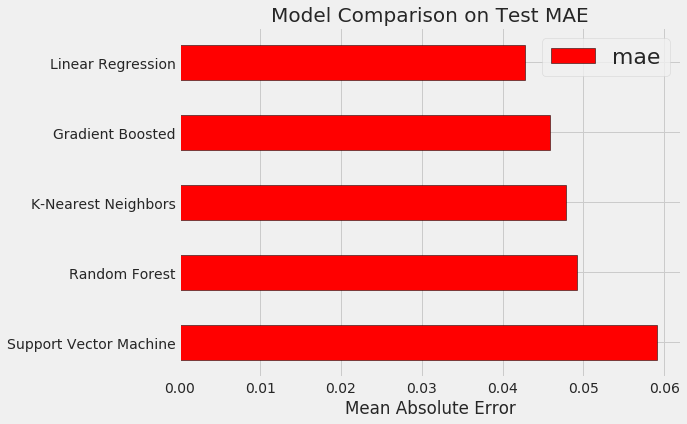

In [282]:
# Now, to better understand the results, I will show in a graph the model that has the better MEAN (closer to original MEAN)

plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

In [283]:
# # # Model Optimization

# # Hyperparameter

# Hyperparameter Tuning with Random Search and Cross Validation

# Here we will implement random search with cross validation to select the optimal hyperparameters for the gradient boosting regressor. 
# We first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, 
# and then select the hyperparameters with the best performance.

# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [284]:
# In the code below, we create the Randomized Search Object passing in the following parameters:

#    estimator: the model
#    param_distributions: the distribution of parameters we defined
#    cv the number of folds to use for k-fold cross validation
#    n_iter: the number of different combinations to try
#    scoring: which metric to use when evaluating candidates
#    n_jobs: number of cores to run in parallel (-1 will use all available)
#    verbose: how much information to display (1 displays a limited amount)
#    return_train_score: return the training score for each cross-validation fold
#    random_state: fixes the random number generator used so we get the same results every run

In [285]:
# The Randomized Search Object is trained the same way as any other scikit-learn model. 
# After training, we can compare all the different hyperparameter combinations and find the best performing one.

# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [286]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   52.1s finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [287]:
# Scikit-learn uses the negative mean absolute error for evaluation because it wants a metric to maximize. 
# Therefore, a better score will be closer to 0. We can get the results of the randomized search into a dataframe, and sort the values by performance.

# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,...,split2_train_score,split3_train_score,mean_train_score,std_train_score
17,0.521441,0.005879,0.001991,0.000121,...,-0.029068,-0.032300,-0.030715,0.001167
24,0.424457,0.005638,0.001319,0.000188,...,-0.019549,-0.022820,-0.021224,0.001158
19,1.360572,0.052333,0.003395,0.000150,...,-0.023699,-0.025848,-0.025293,0.001791
12,1.216644,0.011474,0.003074,0.000068,...,-0.016100,-0.017934,-0.017076,0.000961
23,0.200658,0.010988,0.001015,0.000048,...,-0.027565,-0.029674,-0.028698,0.000794
20,2.150567,0.011543,0.002748,0.000051,...,-0.000438,-0.000500,-0.000460,0.000026
5,2.179715,0.036056,0.005373,0.000044,...,-0.015620,-0.019290,-0.017556,0.001329
8,3.262533,0.047913,0.004175,0.000085,...,-0.000591,-0.000502,-0.000495,0.000065
14,0.030486,0.001355,0.001011,0.000039,...,-0.033967,-0.036021,-0.034548,0.000912
6,3.156594,0.029858,0.003947,0.000333,...,-0.000450,-0.000477,-0.000457,0.000026


In [288]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [289]:
# The best gradient boosted model has the following hyperparameters:

# loss = lad
# n_estimators = 500
# max_depth = 2
# min_samples_leaf = 8
# min_samples_split = 6
# max_features = None 

In [290]:
# I will focus on a single one, the number of trees in the forest (n_estimators).
# By varying only one hyperparameter, we can directly observe how it affects performance. 
# In the case of the number of trees, we would expect to see a significant affect on the amount of under vs overfitting.

# Here we will use grid search with a grid that only has the n_estimators hyperparameter. 
# We will evaluate a range of trees then plot the training and testing performance to get an idea of what increasing the number of trees does for our model. 
# We will fix the other hyperparameters at the best values returned from random search to isolate the number of trees effect.

In [303]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 2,
                                  min_samples_leaf = 8,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [304]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.1s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samp...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

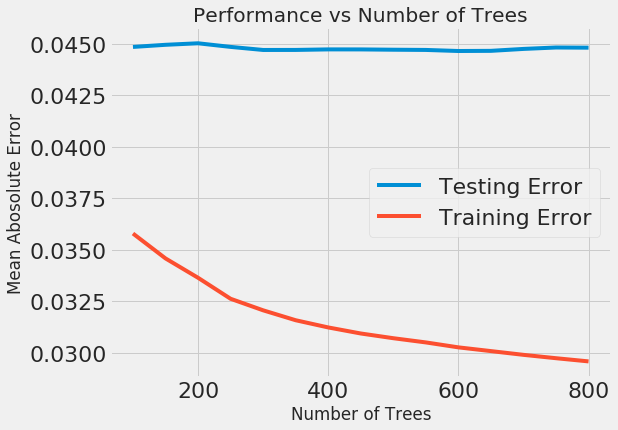

In [305]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize=(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

# There will always be a difference between the training error and testing error (the training error is always lower) but if there is a significant difference, 
# we want to try and reduce overfitting, either by getting more training data or reducing the complexity of the model through hyperparameter tuning or regularization.

# For now, we will use the model with the best performance and accept that it may be overfitting to the training set.

In [306]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,...,split2_train_score,split3_train_score,mean_train_score,std_train_score
10,0.611697,0.012423,0.002059,0.000074,...,-0.028336,-0.032044,-0.030271,0.001362
11,0.676946,0.014415,0.002246,0.000082,...,-0.028142,-0.031833,-0.030089,0.001365
4,0.175750,0.004027,0.000992,0.000088,...,-0.030469,-0.033913,-0.032068,0.001226
9,0.472756,0.100134,0.001975,0.000073,...,-0.028723,-0.032172,-0.030510,0.001245
5,0.203858,0.005646,0.001043,0.000109,...,-0.029991,-0.033382,-0.031587,0.001203


In [307]:
# # # Evaluate Final Model on the Test Set

# We will use the best model from hyperparameter tuning to make predictions on the testing set.

# For comparison, we can also look at the performance of the default model. The code below creates the final model, trains it (with timing), and evaluates on the test set.

# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=600, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [308]:
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

27.2 ms ± 1.17 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [309]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

348 ms ± 6.39 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [310]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

# The model have the very good performace!!!

Default model performance on the test set: MAE = 0.0462.
Final model performance on the test set:   MAE = 0.0435.


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


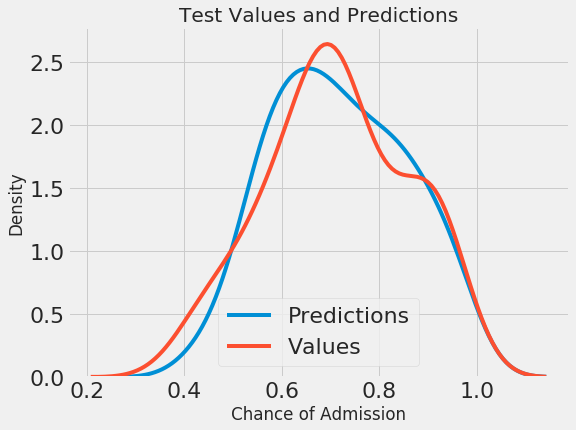

In [311]:
# To get a sense of the predictions, we can plot the distribution of true values on the test set and the predicted values on the test set.

# Train the model.
lr.fit(X_train, y_train)
    
# Make predictions and evalute.
model_pred = lr.predict(X_test)
    
figsize=(8, 8)

# Density plot of the final predictions and the test values.
sns.kdeplot(model_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot.
plt.xlabel('Chance of Admission'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

# The distribution looks to be nearly the same.

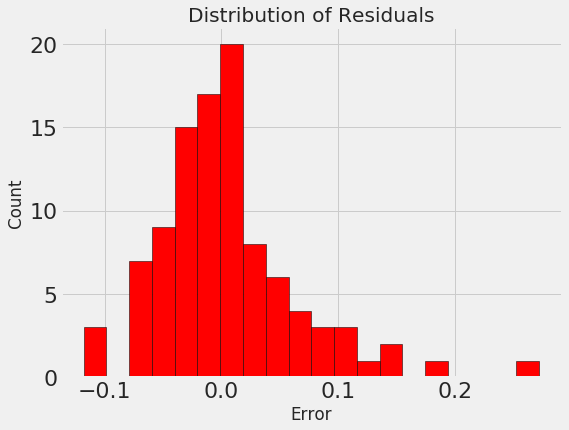

In [312]:
# Another diagnostic plot is a histogram of the residuals. 
# Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low).

figsize = (6, 6)

# Calculate the residuals 
residuals = model_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

# The residuals are close to normally disributed, with a few noticeable outliers on the low end. 
# These indicate errors where the model estimate was far below that of the true value.

In [313]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [314]:
# # # Interprete the Model

# # Feature Importances

# Extract the feature importances into a dataframe
graduate_features = graduate.drop(labels='Chance', axis=1)
feature_results = pd.DataFrame({'feature': list(graduate_features.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,CGPA,0.520548
1,GRE,0.348582
2,TOEFL,0.054804
3,LOR,0.030340
4,SOP,0.020161
5,UniversityRating,0.015420
6,Research,0.010145


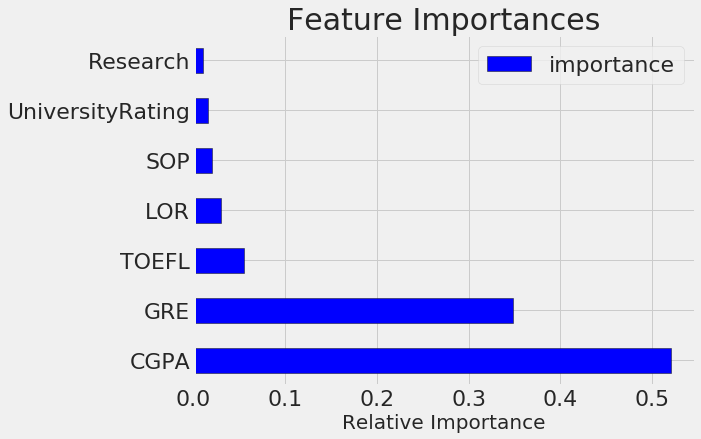

In [316]:
figsize=(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances', size = 30);

In [319]:
# # Use Feature Importances for Feature Selection

# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(graduate_features.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_train_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_train_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (400, 7)
Most important testing  features shape:  (100, 7)


In [320]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(X_train, y_train)
lr_full_pred = lr.predict(X_test)

# Fit on reduced set of features
lr.fit(X_train_reduced, y_train)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))

Linear Regression Full Results: MAE =    0.0427.
Linear Regression Reduced Results: MAE = 0.0427.


In [321]:
# Create the model with the same hyperparamters
model_reduced = GradientBoostingRegressor(loss='lad', max_depth=2, max_features=None,
                                  min_samples_leaf=8, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_train_reduced, y_train)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

Gradient Boosted Reduced Results: MAE = 0.0429


In [322]:
# # Locally Interpretable Model-agnostic Explanations

# Find the residuals
residuals = abs(model_reduced_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [325]:
# Create a lime explainer object
# LIME for explaining predictions
import lime 
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train_reduced, 
                                                   mode = 'regression',
                                                   training_labels = y_train,
                                                   feature_names = list(most_important_features))

Prediction: 0.7288
Actual Value: 0.4500


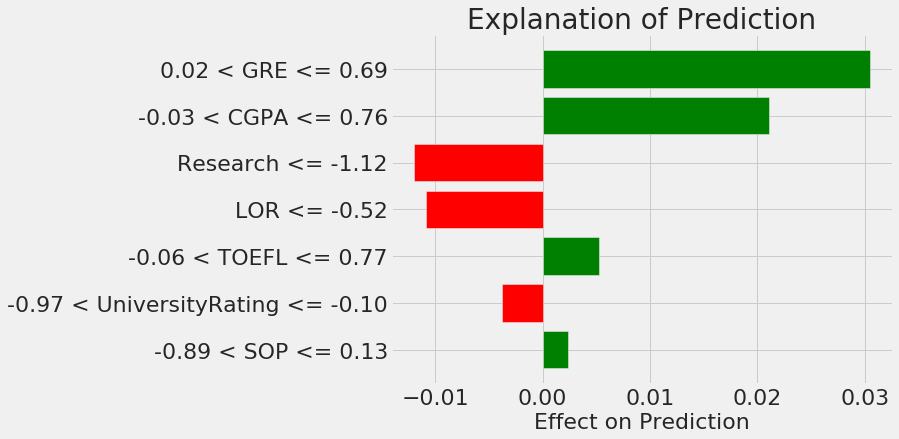

In [326]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

Prediction: 0.8899
Actual Value: 0.8900


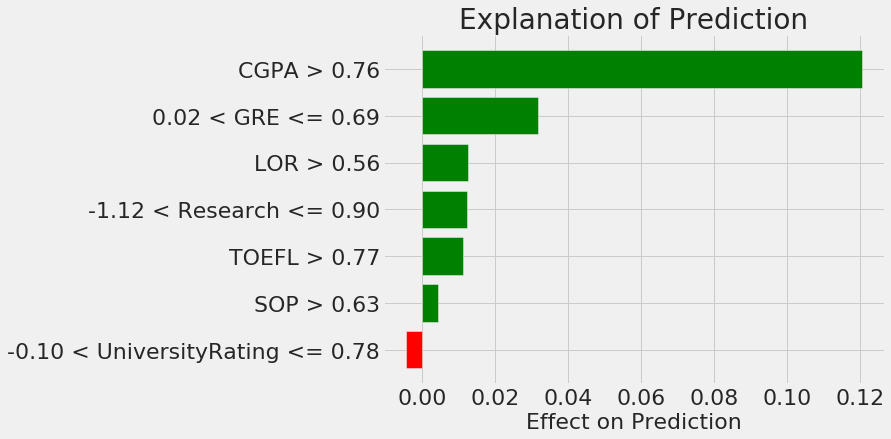

In [328]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);